In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#collecting data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

as you can see label is continueos data   
so it is a regression problem                                                 
 few columns have string data

In [ ]:
#lets look few more things about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


total entries are 1338   
no missing values  
sex, smoker and region are types of object data  
charges and float are types of float  
age and children are type of integer    
its look like children is a categorical data        

In [ ]:
#lets check null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#lets check any space data points are there or not (it will return true if space is pressent or else only false)
for i in df.columns:
  print(i)
  temp=df[i]==' '
  print(temp.unique())
  print('-------------')

age
[False]
-------------
sex
[False]
-------------
bmi
[False]
-------------
children
[False]
-------------
smoker
[False]
-------------
region
[False]
-------------
charges
[False]
-------------


In [ ]:
#checking unique data point of all features
cat_features=['sex','children','smoker','region']
for i in cat_features:
  print(i)
  print(df[i].unique())
  print('----------------')

sex
['female' 'male']
----------------
children
[0 1 3 2 5 4]
----------------
smoker
['yes' 'no']
----------------
region
['southwest' 'southeast' 'northwest' 'northeast']
----------------


sex and smoker are binary classified  
children and region are multiclass classified

In [ ]:
#Encoding Categorical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encod_features=['sex','smoker','region']
for i in encod_features:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


age mean and meadian looks fair no skewness  
similarly in bmi mean and meadian mostly close no skewness


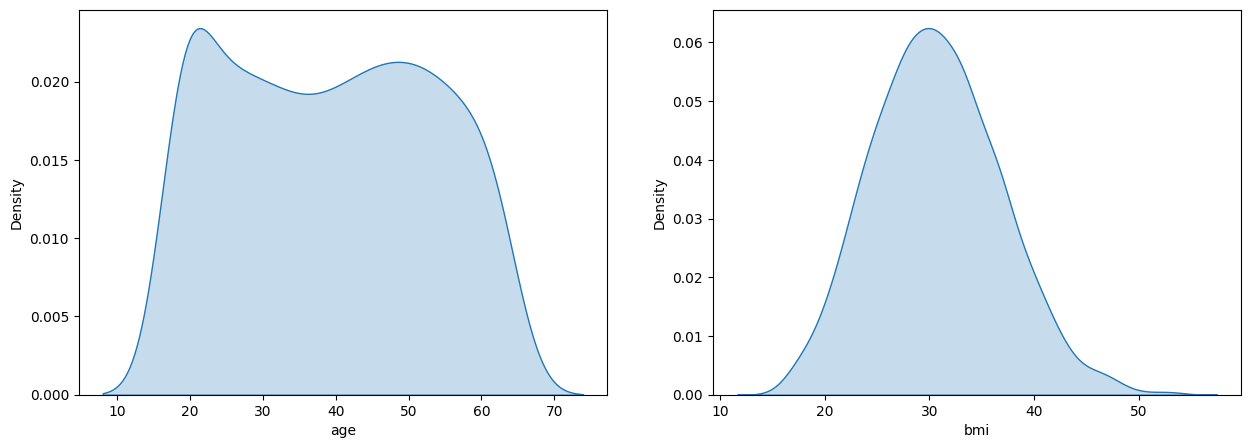

In [ ]:
#checking distribution of continuos features
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.kdeplot(df,x='age',fill=True)
plt.subplot(1,2,2)
sns.kdeplot(df,x='bmi',fill=True)

plt.show()

distribution looks good

In [ ]:
#lets check skewness of continuos varibales
print(df['age'].skew())
print(df['bmi'].skew())

0.05567251565299186
0.2840471105987448


<Axes: >

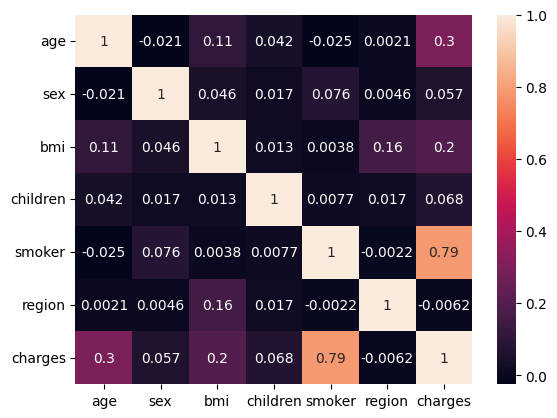

In [ ]:
#checking correlation
sns.heatmap(df.corr(),annot=True)

**Feature and label seprating**

In [ ]:
X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target


it is a good idea to make age and bmi unitless to avoid any unwanted importance by model according to high age or high bmi

In [ ]:
#centrlizing data
scal_feature=['age','bmi']
scale=StandardScaler()
X[scal_feature]=scale.fit_transform(X[scal_feature])


In [ ]:
maxscor=0
ind=0
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

  lrm=LinearRegression()
  lrm.fit(X_train,y_train)
  y_pred=lrm.predict(X_test)
  scor=r2_score(y_test,y_pred)
  if scor>maxscor:
    maxscore=scor
    ind=i

print('high score',maxscore,'at random value',ind)

high score 0.7406856516523257 at random value 99


**Dividing data for Training and Testing**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

**Model Building**

In [ ]:
def model_build(model,x_train,y_train,x_test,y_test):
  model_tr=model.fit(x_train,y_train)
  print('----------training score------------')
  print(r2_score(y_train,model_tr.predict(X_train)))
  print('------------------------------------')
  print('          accuracy score            ')
  y_pred=model_tr.predict(x_test)
  print(r2_score(y_test,y_pred))
  print('-------------------------------------')
  print('         Mean Absulate Error         ')
  print(mean_absolute_error(y_test,y_pred))

In [ ]:
#building linearregressor
lrm=LinearRegression()
model_build(lrm,x_train,y_train,x_test,y_test)

----------training score------------
0.7521877761879817
-----------------------------------------
accuracy score
0.7406856516523257
------------------------------------------
Mean Absulate Error
4281.683521092433


In [ ]:
#building randomforestregressor
rfr=RandomForestRegressor()
model_build(rfr,x_train,y_train,x_test,y_test)

----------training score------------
0.977065024824883
-----------------------------------------
accuracy score
0.8194227613453066
------------------------------------------
Mean Absulate Error
2823.9097378133847


In [ ]:
#building gradientboostingregressor
gbr=GradientBoostingRegressor()
model_build(gbr,x_train,y_train,x_test,y_test)

----------training score------------
0.9096770710241873
-----------------------------------------
accuracy score
0.8285317598014706
------------------------------------------
Mean Absulate Error
2696.5441036160964


In [ ]:
#building baggingregressor
br=BaggingRegressor()
model_build(br,x_train,y_train,x_test,y_test)

----------training score------------
0.9708249569560204
-----------------------------------------
accuracy score
0.7975344750780827
------------------------------------------
Mean Absulate Error
3050.749759608209


**Cross Validation**

In [ ]:
#defining function for cros validation
def cross_check(model,x_scal,y,n):
  cv=cross_val_score(model,x_scal,y,cv=n)
  print(cv)
  print("%2.2f"%(np.mean(cv)*100))

  print('difference between model accuracy score before CV and after cross validation scor is : %2.2f '%((r2_score(y_test,model.predict(x_test))-np.mean(cv))*100))

In [ ]:
#cross validation for linearregressor
cross_check(lrm,X,y,50)

[ 0.73061824  0.85954356  0.70049442  0.7353224   0.79828658  0.50152309
  0.91730594  0.82013223  0.40432064  0.80662756  0.82684339  0.64325099
  0.84634488  0.62086338  0.47761795  0.71191266  0.73581997  0.5814946
  0.80802049  0.42517688  0.81838144  0.73173125  0.76387851  0.81512253
  0.83328149  0.79251493  0.85477525  0.80217825  0.57810881  0.62482347
  0.80254971  0.84194427  0.76316343  0.86193359  0.30622608  0.7950383
 -0.01247107  0.48678463  0.63245637  0.87301356  0.77938336  0.81474894
  0.74127421  0.5567633   0.55465258  0.75777463  0.84431067  0.79179995
  0.77973911  0.6392501 ]
70.35
difference between model accuracy score before CV and after cross validation scor is : 3.72 


In [ ]:
#cross validation for RandomForestRegressor
cross_check(rfr,X,y,50)

[0.82664506 0.90770132 0.89587481 0.88154317 0.77300789 0.68263034
 0.93700908 0.86208763 0.55808226 0.93125833 0.90828305 0.74461583
 0.89832378 0.76451669 0.54252111 0.77077842 0.8490385  0.44713974
 0.93098733 0.42692641 0.86768947 0.86658451 0.86455866 0.83549288
 0.9136437  0.83447385 0.81645414 0.95033151 0.89785922 0.74473747
 0.89589857 0.93250953 0.89122728 0.90152086 0.27171742 0.81701185
 0.42352146 0.61459291 0.8557774  0.92108814 0.88092625 0.87962105
 0.80662332 0.82638131 0.69649809 0.76566499 0.90531278 0.95898439
 0.8761868  0.89771505]
80.30
difference between model accuracy score before CV and after cross validation scor is : 1.64 


In [ ]:
#cross validation for GradientBoostingRegressor
cross_check(gbr,X,y,50)

[0.83224621 0.94679418 0.89202031 0.90741918 0.8203946  0.73964368
 0.97498308 0.9522303  0.57760585 0.95542832 0.91509944 0.79870438
 0.91359756 0.78208403 0.61785708 0.84315714 0.83144417 0.53806574
 0.9382221  0.41591243 0.92053929 0.85155358 0.88870822 0.88091894
 0.92236072 0.87871282 0.95966027 0.95120361 0.85837847 0.78598664
 0.9233245  0.9489172  0.8931043  0.94131627 0.37358493 0.88425516
 0.43924284 0.65455292 0.83420814 0.95733101 0.91639484 0.88539023
 0.83561839 0.81213101 0.66000288 0.8041267  0.91738264 0.97106633
 0.88455754 0.84068574]
82.94
difference between model accuracy score before CV and after cross validation scor is : -0.08 


In [ ]:
#cross validation for BaggingRegressor
cross_check(br,X,y,50)

[0.82912477 0.91695849 0.86487664 0.8754678  0.75748578 0.63310732
 0.9390703  0.82854803 0.58842124 0.90490303 0.88269563 0.7424399
 0.9006396  0.77709547 0.54947728 0.76652952 0.80360529 0.46563833
 0.93892891 0.41040027 0.88326954 0.89307932 0.89341025 0.81301558
 0.91913289 0.84721639 0.74595288 0.95230837 0.88777483 0.74753456
 0.90807981 0.92583692 0.88224921 0.84944736 0.23943373 0.79459966
 0.16092951 0.61926786 0.87196454 0.93298115 0.87433097 0.86379859
 0.79540843 0.82397802 0.6196722  0.75779834 0.89095269 0.95655815
 0.87368265 0.86198592]
78.92
difference between model accuracy score before CV and after cross validation scor is : 0.83 


GradientBoostingRegressor is having least difference between r2_score and cv mean score , also it is having less MSE as copmare to other models , we are choosing GradientBoostingRegressor

**Hyperparamter Tuning**

In [ ]:
#paramter tuning using GridSearchCV

param_grid={
            'learning_rate': [0.1, 0.01, 0.001],
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 4, 5],
            'min_samples_split':[2,4],
            'max_leaf_nodes': [5, 10, 20],
            }
gd=GridSearchCV(estimator=gbr,param_grid=param_grid,cv=10)
gd.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5], 'max_leaf_nodes': [5, 10, 20],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]})

In [ ]:
gd.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_leaf_nodes': 20,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
param_grid={'learning_rate': 0.1,
            'max_depth': 3,
            'max_leaf_nodes': 20,
            'min_samples_split': 2,
            'n_estimators': 100}

In [ ]:
#building gradientboostingregressor
gbr=GradientBoostingRegressor(max_leaf_nodes=20,)
model_build(gbr,x_train,y_train,x_test,y_test)

----------training score------------
0.9096770710241873
------------------------------------
          accuracy score            
0.8282453008659763
-------------------------------------
         Mean Absulate Error         
2697.826274670176


In [ ]:
copmarison_dataframe=pd.DataFrame()
copmarison_dataframe['Actual Value']=y_test
copmarison_dataframe['Predicted Value']=gbr.predict(x_test)
print('-----First 5 Rows---------\n')
print(copmarison_dataframe.head(5))
print('\n-----Last 5 Rows----------\n')
print(copmarison_dataframe.tail(5))


-----First 5 Rows---------

      Actual Value  Predicted Value
156     21223.6758     24490.617296
123     39556.4945     42965.278908
1269     8615.3000      9984.278108
512      9361.3268     17510.200964
377     38126.2465     38196.049601

-----Last 5 Rows----------

     Actual Value  Predicted Value
101    3645.08940      4734.781961
939    9487.64420     11614.960037
22     1137.01100      1063.593163
801   14313.84630     14887.877418
667   40003.33225     38968.603599


**Model Saving**

In [ ]:
#Saving GradientBoostingregressor using pickle module
import pickle
pickle.dump(gbr,open('GradientBoostingRegressor_medical_insu_cost.pkl','wb'))

In [ ]:
gbr=pickle.load(open('GradientBoostingRegressor_medical_insu_cost.pkl','rb'))